In [3]:
from math import ceil
from matplotlib.lines import Line2D
import networkx as nx
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from copy import deepcopy
from glob import glob


In [ ]:
def plot_transition_graph_group(
    project_dir,
    model_name,
    groups,
    trans_mats,
    usages,
    syll_include,
    save_dir=None,
    layout="circular",
    node_scaling=2000,
    show_syllable_names=False,
):
    """Plot the transition graph for each group.

    Parameters
    ----------
    groups : list
        the list of groups to plot
    trans_mats : list
        the list of transition matrices for each group
    usages : list
        the list of syllable usage for each group
    layout : str, optional
        the layout of the graph, by default 'circular'
    node_scaling : int, optional
        the scaling factor for the node size, by default 2000,
    show_syllable_names : bool, optional
        whether to show just syllable indexes (False) or syllable indexes and
        names (True)
    """
    # if show_syllable_names:
    #     syll_names = get_syllable_names(project_dir, model_name, syll_include)
    # else:
    #     syll_names = [f"{ix}" for ix in syll_include]

    syll_names = most_likely_states
    usages = 
    

    n_row = ceil(len(groups) / 2)
    fig, all_axes = plt.subplots(n_row, 2, figsize=(20, 10 * n_row))
    ax = all_axes.flat

    for i in range(len(groups)):
        G = nx.from_numpy_array(trans_mats[i] * 100)
        widths = nx.get_edge_attributes(G, "weight")
        if layout == "circular":
            pos = nx.circular_layout(G)
        else:
            pos = nx.spring_layout(G)
        # get node list
        nodelist = G.nodes()
        # normalize the usage values
        sum_usages = sum(usages[i])
        normalized_usages = (
            np.array([u / sum_usages for u in usages[i]]) * node_scaling + 1000
        )
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=nodelist,
            node_size=normalized_usages,
            node_color="white",
            edgecolors="red",
            ax=ax[i],
        )
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=widths.keys(),
            width=list(widths.values()),
            edge_color="black",
            ax=ax[i],
            alpha=0.6,
        )
        nx.draw_networkx_labels(
            G,
            pos=pos,
            labels=dict(zip(nodelist, syll_names)),
            font_color="black",
            ax=ax[i],
        )
        ax[i].set_title(groups[i])
    # turn off the axis spines
    for sub_ax in ax:
        sub_ax.axis("off")




In [4]:
num_states = 4
transition_probs = (np.arange(num_states)**10).astype(float)
transition_probs /= transition_probs.sum()
transition_matrix = np.zeros((num_states, num_states))
for k, p in enumerate(transition_probs[::-1]):
    transition_matrix += np.roll(p * np.eye(num_states), k, axis=1)
    

In [7]:
    syll_names = np.random.randint(4, size=1000)

In [10]:
unique, counts = np.unique(syll_names, return_counts=True)

In [20]:
syll_names = [2, 2, 2, 2, 3, 2, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,   0, 0, 0, 0, 
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3,3, 1, 1, 1, 1, 1,1 ,1 ,1 ,1, 2, 2, 1, 2, 2, 2, 2, 2]

In [5]:
transition_matrix

array([[9.82937710e-01, 1.70456437e-02, 1.66461364e-05, 0.00000000e+00],
       [0.00000000e+00, 9.82937710e-01, 1.70456437e-02, 1.66461364e-05],
       [1.66461364e-05, 0.00000000e+00, 9.82937710e-01, 1.70456437e-02],
       [1.70456437e-02, 1.66461364e-05, 0.00000000e+00, 9.82937710e-01]])

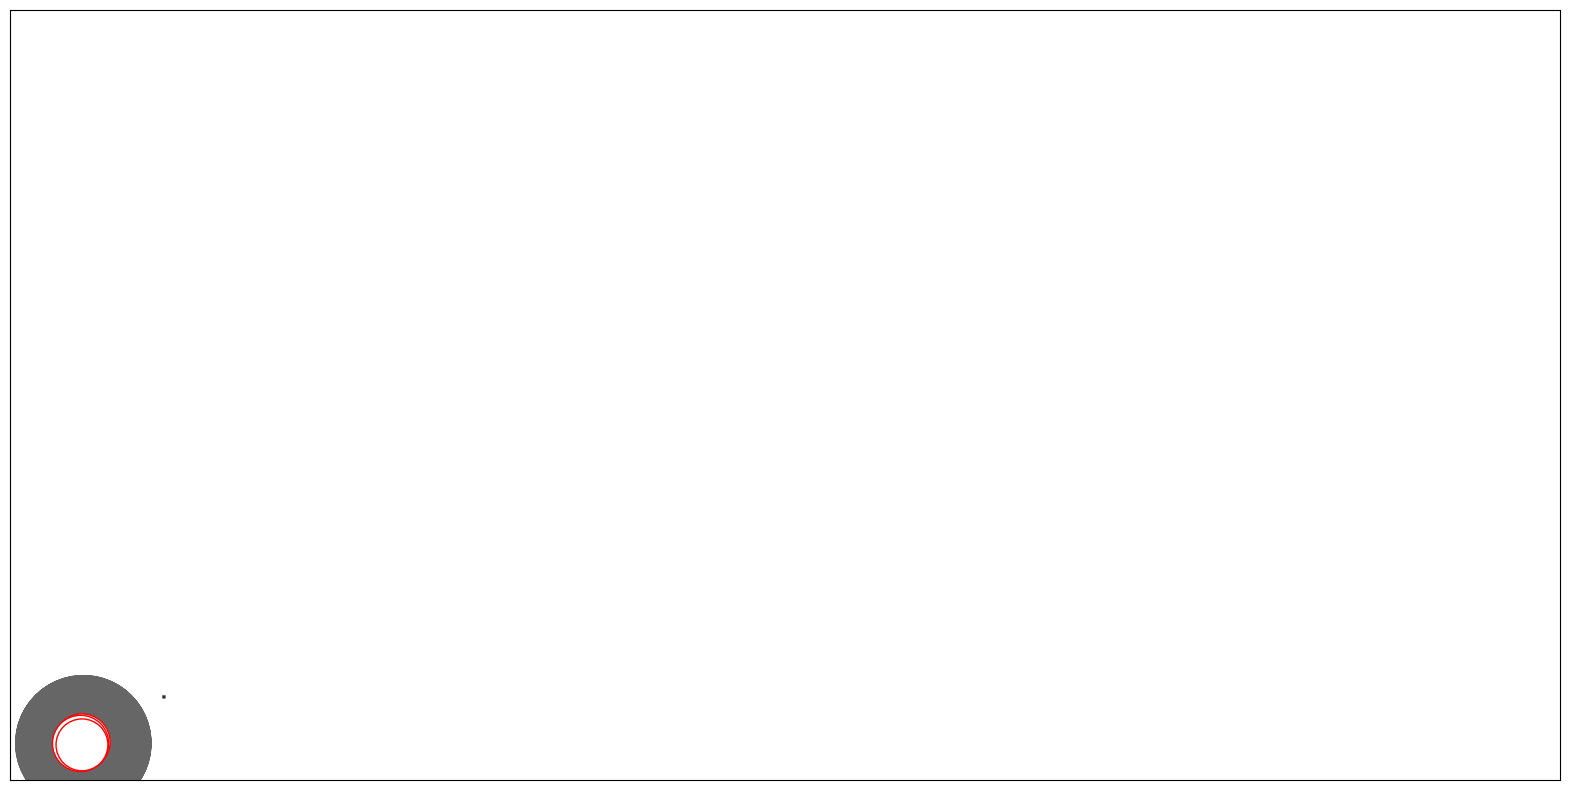

In [21]:
    # syll_names = np.random.randint(4, size=1000)
    _, usages = np.unique(syll_names, return_counts=True)
    trans_mat = transition_matrix
    layout="circular"
    node_scaling=2000
    show_syllable_names=False

    # n_row = ceil(len(groups) / 2)
    fig, all_axes = plt.subplots(1, 1, figsize=(20, 10 * 1))
    # ax = all_axes.flat

    # for i in range(len(groups)):
    G = nx.from_numpy_array(trans_mat * 100)
    widths = nx.get_edge_attributes(G, "weight")
    if layout == "circular":
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G)
    # get node list
    nodelist = G.nodes()
    # normalize the usage values
    sum_usages = sum(usages)
    normalized_usages = (
        np.array([u / sum_usages for u in usages]) * node_scaling + 1000
    )
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=nodelist,
        node_size=normalized_usages,
        node_color="white",
        edgecolors="red",
    )
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=widths.keys(),
        width=list(widths.values()),
        edge_color="black",
        alpha=0.6,
    )
    # nx.draw_networkx_labels(
    #     G,
    #     pos=pos,
    #     labels=dict(zip(nodelist, syll_names)),
    #     font_color="black",
    # )  #        ax=ax,

    # # turn off the axis spines
    # for sub_ax in ax:
    #     sub_ax.axis("off")